In [8]:
pip install spacy


In [9]:
!python -m spacy download en_core_web_md

2024-01-11 06:09:01.934868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 06:09:01.934929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 06:09:01.936780: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 06:09:01.945348: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-11 06:09:03.693020: W tensorflow/compiler/tf2

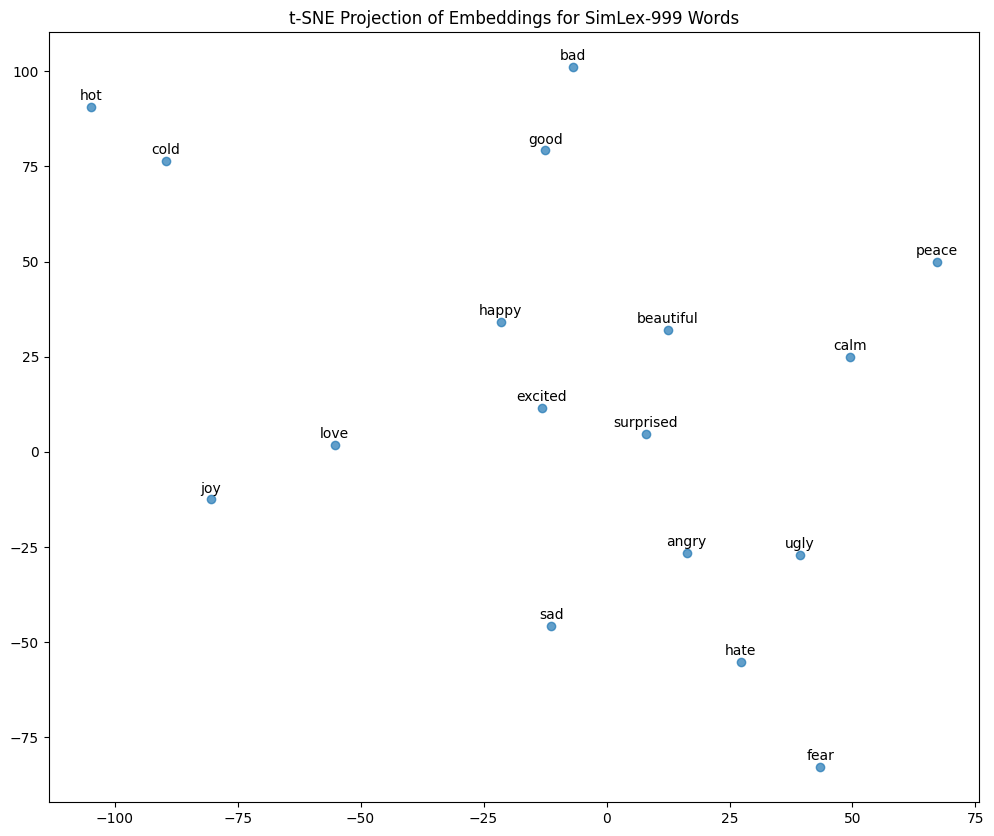

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load SimLex-999 dataset (adjust the path to the actual location of your dataset)
simlex_path = '/content/SimLex-999.txt'
simlex_df = pd.read_csv(simlex_path, sep='\t')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import spacy

# Load spaCy with pre-trained embeddings
nlp = spacy.load("en_core_web_md")


# Select a subset of words for visualization (adjust as needed)
words_to_visualize = ['happy', 'sad', 'angry', 'excited', 'surprised', 'calm',
                      'love', 'hate', 'fear', 'joy', 'peace',
                      'good', 'bad', 'beautiful', 'ugly', 'hot', 'cold']

# Filter the dataset to include only the selected words
subset_df = simlex_df[simlex_df['word1'].isin(words_to_visualize) | simlex_df['word2'].isin(words_to_visualize)]

# Get embeddings for each word in the subset
embeddings = [nlp(word).vector for word in words_to_visualize]
embedding_array = np.array(embeddings)
# Use t-SNE to reduce the dimensionality for plotting
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embedding_tsne = tsne.fit_transform(embedding_array)
#embedding_tsne = tsne.fit_transform(embeddings)

# Create a DataFrame for the reduced dimensions
plot_data = pd.DataFrame(embedding_tsne, columns=['Dimension 1', 'Dimension 2'])
plot_data['Word'] = words_to_visualize

# Plot the 2D scatter plot
plt.figure(figsize=(12, 10))
plt.scatter(x=plot_data['Dimension 1'], y=plot_data['Dimension 2'], alpha=0.7)

# Annotate each point with the corresponding word
for i, word in enumerate(words_to_visualize):
    x, y = plot_data[plot_data['Word'] == word][['Dimension 1', 'Dimension 2']].values[0]
    plt.annotate(word, (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.title('t-SNE Projection of Embeddings for SimLex-999 Words')
plt.show()
